# import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import nltk
import networkx as nx

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
not_needed = ['AU', 'BA', 'BF', 'CA', 'GP', 'BE', 'SE', 'BS', 'CY' ,'CL', 'SP', 'HO', 'RP', 'EM', 
              'RI', 'OI', 'FU', 'FX', 'CR', 'TC', 'U1', 'U2', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 
              'VL', 'IS', 'SI', 'PN', 'SU', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'GA', 'PM', 'UT', 
              'OA', 'HP', 'HC', 'DA', 'WC'] 

def to_df(directory, not_needed=not_needed):
    file_names = os.listdir(directory)
    data_frames = [pd.read_csv(directory+file_name, sep='\t',  engine='c', index_col=False, quotechar='^') for file_name in file_names] 
    print('Checking duplicates...')
    all_clear = True
    for i in range(len(data_frames)):
        for j in range(i+1, len(data_frames)):
            if str(data_frames[i].iloc[0,:]) == str(data_frames[j].iloc[0,:]):
                print('Duplicated dataframes:' + str(file_names[i]) +', '+str(file_names[j]))
                all_clear = False
    if all_clear:
        print('All clear')
    else:
        print('Check the files')
        
    concatenated = pd.concat(data_frames, ignore_index=True)
    if not_needed:
        concatenated.drop(columns=not_needed, inplace=True)
    concatenated.drop_duplicates(inplace=True)
    return concatenated

In [60]:
data = to_df('/content/drive/MyDrive/data/')

Checking duplicates...
All clear


In [61]:
data.to_excel("/content/drive/MyDrive/data.xlsx")


In [63]:
data = pd.read_excel('/content/drive/MyDrive/data.xlsx')

In [ ]:
data

In [64]:
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data.PD = data.PD.str[:3].str.capitalize()
data_w_date = data[data.PD.isin(mon)].copy()
data_w_date.PD = data_w_date.PD.apply(lambda x: datetime.strptime(x,'%b').strftime('2020-%m'))

In [65]:
len(data_w_date)

66578

In [66]:
len(data)

80004

# Document type

In [23]:
data.PT.dropna().value_counts()

J    79999
S        3
B        1
Name: PT, dtype: int64

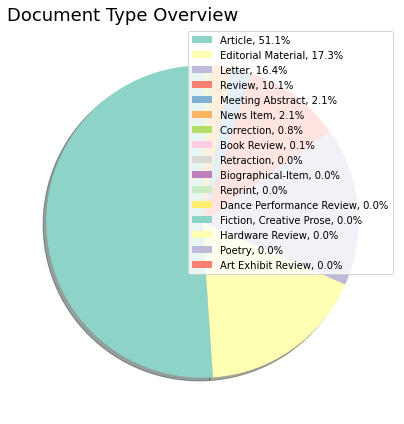

In [24]:
data_doc = data.DT.dropna().str.split(';').apply(lambda x: x[0]).value_counts().rename_axis('DocType').reset_index(name='Count')

with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    labels = data_doc.iloc[:,0]
    size = data_doc.iloc[:,1]/data_doc.iloc[:,1].sum()*100
    ax1.pie(data_doc.iloc[:,1], startangle=90, shadow=True)
    ax1.legend(labels =['%s, %1.1f%%' % (l,s) for l,s in zip(labels,size)])
    ax1.set_title('Document Type Overview', fontsize=18, loc='left')
    plt.tight_layout()
    plt.savefig('doc_type.jpg')
    plt.show()


# By language

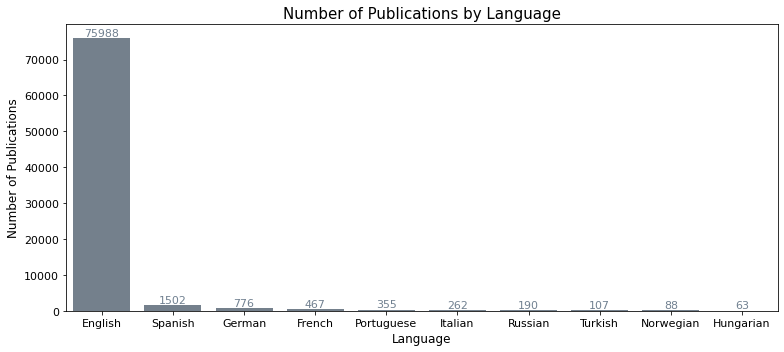

In [25]:
data_lang = data.LA.dropna().value_counts().rename_axis('Language').reset_index(name='Count')[0:10]

plt.figure(figsize=(11,5))
g = sns.barplot(x=data_lang.Language, y=data_lang.Count, color='slategrey')
plt.xlabel('Language',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Language', fontsize=15)
plt.tight_layout()
plt.savefig('doc_lang.jpg')
plt.show()

In [26]:
data.LA.dropna().value_counts()

English        75988
Spanish         1502
German           776
French           467
Portuguese       355
Italian          262
Russian          190
Turkish          107
Norwegian         88
Hungarian         63
Chinese           48
Polish            31
Czech             22
Icelandic         15
Catalan           13
Croatian          12
Ukrainian         11
Korean            10
Slovenian         10
Greek              9
Bulgarian          4
Unspecified        3
Slovak             3
Dutch              3
Indonesian         2
Lithuanian         2
Afrikaans          2
Japanese           2
Malay              1
Swedish            1
Arabic             1
Name: LA, dtype: int64

# By source

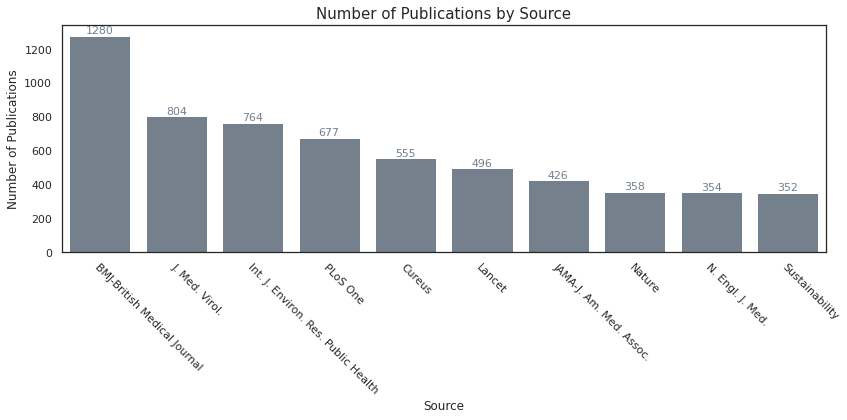

In [69]:
data_source = data.JI.dropna().value_counts().rename_axis('Title').reset_index(name='Count')[0:10]

plt.figure(figsize=(12,6))
g=sns.barplot(x=data_source.Title, y=data_source.Count, color='slategrey')
plt.xlabel('Source',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')
plt.title('Number of Publications by Source', fontsize=15)
plt.tight_layout()
plt.savefig('doc_source.jpg')
plt.show()

# Number of pages


In [28]:
len(data.PG)

80003

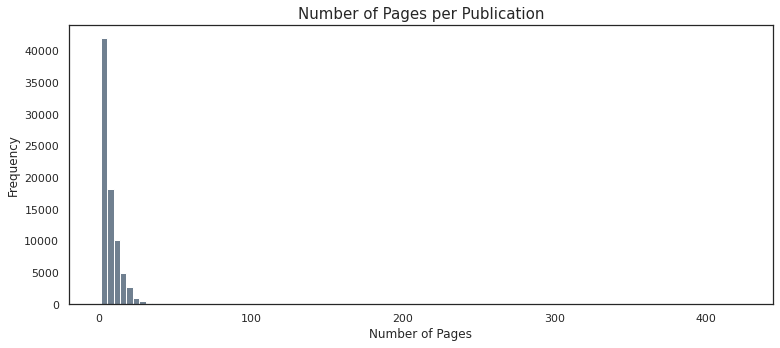

In [73]:
data_page = data.PG.dropna()

plt.figure(figsize=(11,5))
plt.hist(x=data_page, color='slategrey', bins=100)
plt.xlabel('Number of Pages',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Pages per Publication', fontsize=15)
plt.tight_layout()
plt.savefig('doc_page.jpg')
plt.show()

# By institution

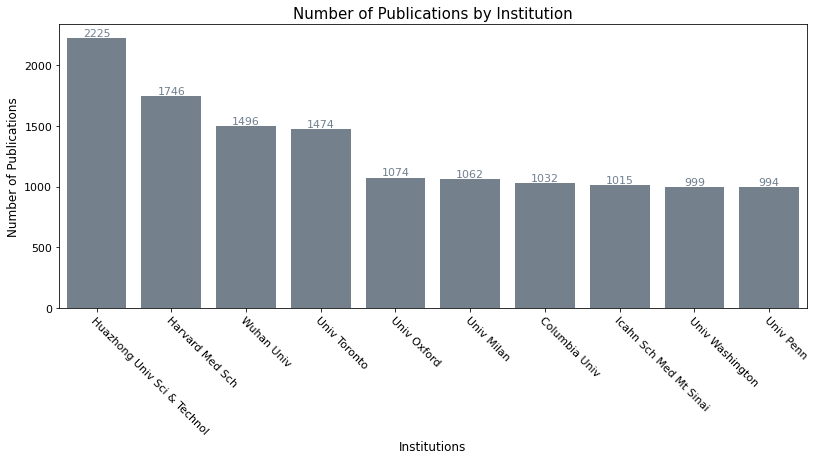

In [30]:
data_inst = data[['C1']].dropna()
data_inst.C1= data_inst.C1.apply(lambda x: re.findall(r"\] (.*?)\,", x))
data_inst_all = data_inst.explode('C1').C1.value_counts().rename_axis('Institutions').reset_index(name='Count')[0:10]


plt.figure(figsize=(11.5,6.5))
g=sns.barplot(x=data_inst_all.Institutions, y=data_inst_all.Count, color='slategrey')
plt.xlabel('Institutions',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Institution', fontsize=15)
plt.tight_layout()
plt.savefig('doc_inst.jpg')
plt.show()

# By country

In [31]:
data_country = data[['C1']].dropna()
data_country.C1 = data_country.C1.apply(lambda x: re.sub(r"\[(.*?)\] ", "", x).split('; ')).to_list()

data_country['country']=[list(set(i)) for i in [[j.split(', ')[-1] for j in i] for i in data_country.C1]] 

def replace(string):
  if 'USA' in string:
    return 'USA'
  elif 'North Ireland' in string:
    return 'UK'
  elif 'Wales' in string:
    return 'UK'
  elif 'Scotland' in string:
    return 'UK'
  elif 'England' in string:
    return 'UK'
  elif 'P. R. China' in string:
    return 'China'
  elif 'Peoples R China' in string:
    return 'China'

  else:
    return string
data_country['replace_1'] = [[replace(i) for i in j] for j in data_country['country']]
data_country['replace'] = [list(set(i)) for i in data_country['replace_1']]



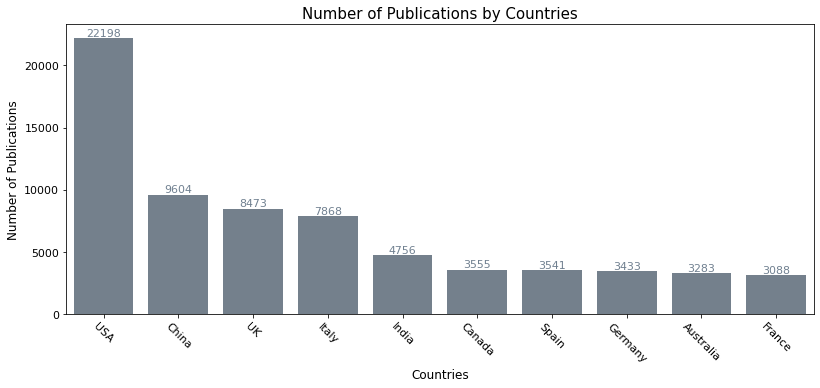

In [32]:
data_country_all = data_country.explode('replace')['replace'].value_counts().rename_axis('Countries').reset_index(name='Count')
data_country_10 = data_country_all[0:10]


plt.figure(figsize=(11.5,5.5))
g=sns.barplot(x=data_country_10.Countries, y=data_country_10.Count, color='slategrey')
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45)
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Countries', fontsize=15)
plt.tight_layout()
plt.savefig('doc_country.jpg')
plt.show()

In [33]:
data_country_all.Countries.unique()

array(['USA', 'China', 'UK', 'Italy', 'India', 'Canada', 'Spain',
       'Germany', 'Australia', 'France', 'Brazil', 'Iran', 'Turkey',
       'Switzerland', 'Netherlands', 'Japan', 'Saudi Arabia', 'Singapore',
       'South Korea', 'Belgium', 'Pakistan', 'South Africa', 'Sweden',
       'Poland', 'Austria', 'Greece', 'Israel', 'Portugal', 'Taiwan',
       'Russia', 'Egypt', 'Mexico', 'Ireland', 'Denmark', 'Malaysia',
       'Norway', 'New Zealand', 'Colombia', 'Chile', 'Thailand',
       'Argentina', 'Indonesia', 'Bangladesh', 'Romania', 'Nigeria',
       'U Arab Emirates', 'Vietnam', 'Finland', 'Peru', 'Czech Republic',
       'Qatar', 'Hungary', 'Jordan', 'Morocco', 'Lebanon', 'Nepal',
       'Philippines', 'Croatia', 'Ethiopia', 'Ukraine', 'Ecuador',
       'Kenya', 'Serbia', 'Iraq', 'Slovenia', 'Ghana', 'Cuba', 'Kuwait',
       'Cyprus', 'Slovakia', 'Oman', 'Tunisia', 'Uganda', 'Bulgaria',
       'Uruguay', 'Luxembourg', 'Sri Lanka', 'Lithuania', 'Algeria',
       'Cameroon', 'Suda

In [ ]:
country_distr_map=data_country_all.to_excel('country_distr_map.xlsx')

# By research area

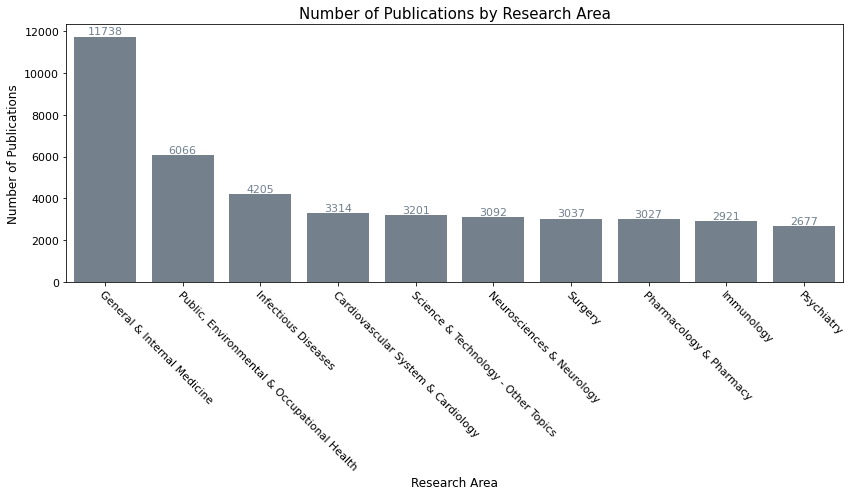

In [34]:
data_research = data[['SC']].dropna()
data_research.SC = data_research.SC.str.split('; ')
data_research_all = data_research.explode('SC').SC.value_counts().rename_axis('ResArea').reset_index(name='Count')[:10]

plt.figure(figsize=(12,7))
g=sns.barplot(x=data_research_all.ResArea, y=data_research_all.Count, color='slategrey')
plt.xlabel('Research Area',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11, rotation = -45, ha='left', rotation_mode='anchor')
plt.yticks(fontsize=11)
for p in g.patches:
             g.annotate("%1.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=11, color='slategrey',xytext=(0, 5), textcoords='offset points')

plt.title('Number of Publications by Research Area', fontsize=15)
plt.tight_layout()
plt.savefig('doc_research.jpg')
plt.show()

# By author keyword

In [35]:
data_keywords=data[['DE']].dropna()
data_keywords.DE = data_keywords.DE.str.split('; ')
data_keywords_full = data_keywords.explode('DE').DE.str.lower().value_counts().rename_axis('Author Keywords').reset_index(name='Count')
data_keywords_full.head(20)


,Author Keywords,Count
0,covid-19,29043
1,sars-cov-2,9194
2,coronavirus,6209
3,pandemic,3977
4,public health,1050
5,coronavirus disease 2019,944
6,mental health,931
7,epidemiology,797
8,covid-19 pandemic,787
9,pneumonia,781


# Author table

In [36]:
data_author = data[['AF']].dropna()
data_author = data_author.loc[data_author.AF != '[Anonymous]']
data_author.AF = data_author.AF.str.split('; ')
data_author_all = data_author.explode('AF').AF.value_counts().rename_axis('AF').reset_index(name='Number of papers')

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Wroclawski, Marcelo L. | Wroclawski, Marcelo Langer
# Fang, Xinyu | Fang, Xin-Yu | 95
# Zhang, Chen | Zhang, Cen | 95
# Hellin, J. | Hellin, Jon | 89
# McKay, Dean | McKay, D. | 82
# Tibdewal, A. | Tibdewal, Anil | 87
# Leung, Wallace Woon Fong | Leung, Wallace Woon-Fong | 96
# Xu, Jingwen | Xu, Jing-Wen | 87
# Ke, Changwen | Ke, Chang-Wen | 88
# Yu, Qizhi | Yu, Qi-Zhi | 84
# Llamas-Velasco, M. | Llamas-Velasco, Mar | 92
# Chicharro, P. | Chicharro, Pablo | 83
# Rodriguez-Jimenez, P. | Rodriguez-Jimenez, Pedro | 89
# De Argila, D. | De Argila, Diego | 83
# Lopez-Fando, Luis | Lopez-Fando, L. | 88
# Chen, Ya-Jun | Chen, Yajun | 87
# Luo, Dan-Ju | Luo, Danju | 86
# Mastroianni, Claudio Maria | Mastroianni, Claudio M. | 90
# Mastroianni, Claudio Maria | Mastroianni, Claudio | 87
# Djiepmo-Njanang, Freddy-Joel | Djiepmo-Njanang, Freddy Joel | 96
# Schneider, E. Marion | Schneider, Marion | 92
# Case, James Brett | Case, James B. | 84
# Rodriguez-Jimenez, Pedro | Rodriguez-Jimenez, P. | 89
# Llamas-Velasco, Mar | Llamas-Velasco, M. | 92
# Carnero-Gonzalez, Lucia | Carnero Gonzalez, Lucia | 96
# Pegorari, Maycon S. | Pegorari, Maycon Sousa | 88
# Matos, Areolino P. | Matos, Areolino Pena | 89
# Nezamabadi, Sasan S. | Nezamabadi, Sasan Salehi | 86
# Lueers, Jan-Christoffer | Luers, Jan Christoffer | 93
# Nezamabadi, Sasan S. | Nezamabadi, Sasan Salehi | 86
# Sahajwalla, Chandrahas G. | Sahajwalla, Chandrahas | 94
# Roses-Gibert, Pau | Roses-Gibert, P. | 91
# Gimeno Castillo, Javier | Gimeno Castillo, J. | 86
# Saenz Aguirre, Amaia | Saenz Aguirre, A. | 86
# Carnero Gonzalez, Lucia | Carnero-Gonzalez, Lucia | 96
# Martinez de Lagran Alvarez de Arcaya, Zurine | Martinez de Lagran Alvarez de Arcaya, Z. | 93
# Gonzalez-Perez, Ricardo | Gonzalez-Perez, R. | 83
# Mitchell, William B. | Mitchell, William Beau | 90
# Olisova, Olga Yu | Olisova, Olga Y. | 94
# Srinivas, Sindhu | Srinivas, Sindhu K. | 91
# Torres, Angeli E. | Torres, Angeli Eloise | 84
# Islam, Md Sariful | Islam, Md Saiful | 97
# Islam, Md Sariful | Islam, Md. Saiful | 94
# Islam, Md Sariful | Islam, M. Saiful | 91
# Dhamoon, Mandip | Dhamoon, Mandip S. | 91
# Brock, Kathy L. | Brock, Kathy | 89
# Kiely, L. F. | Kiely, L. | 86
# Kiely, L. F. | Kiely, L. | 86
# Eustace, J. A. | Eustace, J. | 88
# Tam, Clarence C. | Tam, Clarence | 90
# Marais, Ben | Marais, Ben J. | 88
# Li, Jin-Yan | Liu, Jinyan | 82
# le Roux, Carel W. | Le Roux, Carel W. | 94
# Zhang, Xiao-Chun | Zhang, Xiaochun | 90
# Gao, Ya-Dong | Gao, Ya-dong | 92
# FitzGerald, Garret A. | FitzGerald, Garrett | 90
# Mok, Chris Ka Pun | Mok, Chris K. P. | 85
# Anderson, Evan | Anderson, Evan J. | 90
# Peiris, Malik | Peiris, J. S. Malik | 81
# Loman, Nick J. | Loman, Nick | 88
# Weiss, Daniel J. | Weiss, Daniel | 90
# Miller, Matthew S. | Miller, Matthew | 91
# Cummings, Derek A. T. | Cummings, Derek | 83
# Dell'Omo, Roberto | dell'Omo, Roberto | 94
# Akdis, Cezmi A. | Akdis, Cezmi | 89
# Kumar, Deepak S. | Kumar, Deepak | 90
# Wong, Timothy C. | Wang, Timothy C. | 94
# Friedman, David | Friedman, David E. | 91
# Mastroianni, Claudio | Mastroianni, Claudio M. | 93
# McNamara, Donna Marie | McNamara, Donna | 83
# Haque, Sk. Mafizul | Haque, Sk Mafizul | 97
# Olisova, Olga Y. | Olisova, Olga Yu | 94
# Poland, Gregory | Poland, Gregory A. | 91
# Van Cott, Elizabeth | Van Cott, Elizabeth M. | 93
# Cunningham, Louise | Cunningham, Louise S. | 92
# Khosravi, I | Khosravi, Ismail | 81
# Liebensteiner, M. | Liebensteiner, M. C. | 92
# Ferraro, Anna | Ferraro, A. | 83
# Wiwanitkit, V. | Wiwanitkit, Viroj | 84
# Burmester, Gerd | Burmester, Gerd R. | 91
# Benitez-del-Castillo, Jose M. | Benitez-Del-Castillo, Jose M. | 97
# Hossain, M. Anwar | Hossain, Md Anwar | 94
# Wang, Zhen-ning | Wang, Zhenning | 97
# Qian, Zhaoxin | Qian, Zhao-xin | 96
# Lueers, Jan-Christoffer | Luers, Jan Christoffer | 93
# Segal, Jonathan P. | Segal, Jonathan | 91
# Valverde, Eduardo E. | Valverde, Eduardo | 92
# Van Cott, Elizabeth | Van Cott, Elizabeth M. | 93
# Haque, Sk. Mafizul | Haque, Sk Mafizul | 97
# Mofenson, Lynne | Mofenson, Lynne M. | 91
# Chen, Pei-Liang | Chen Pei-Liang | 97
# Jimenez, Maria Jose | Jimenez, Maria-Jose | 95
# Mohammadi, Mostafa | Mohammdi, Mostafa | 97



In [ ]:
# te_l = list(set([i for j in list(data_author['AF']) for i in j]))
# for i in range(len(te_l)):
#   for j in range(len(te_l[i+1:])):
#     if (fuzz.ratio(te_l[i],te_l[j]) > 90) & (fuzz.ratio(te_l[i],te_l[j]) != 100):
#       print(te_l[i], '|',te_l[j], '|', fuzz.ratio(te_l[i], te_l[j]))

In [37]:
author_cited = data[['AF','Z9','SC']].dropna()
author_cited = author_cited.loc[author_cited.AF != '[Anonymous]']
author_cited.AF = author_cited.AF.str.split(';')
author_cited_all = author_cited.explode('AF').sort_values('Z9', ascending=False).drop(columns = 'SC').reset_index().drop(columns = 'index')
author_cited_all = author_cited_all[['AF', 'Z9']]
au_ci = author_cited_all.groupby('AF').sum().sort_values('Z9', ascending=False)
au_ci_1 = author_cited_all.groupby('AF').count().reset_index().rename(columns={'Z9':'Count'})
au_ci_per = pd.merge(au_ci, au_ci_1, on='AF', how='inner')
au_ci_per['Number cited per paper'] = au_ci_per['Z9']/au_ci_per['Count']
au_ci_per = au_ci_per.drop(columns=['Z9', 'Count']).sort_values('Number cited per paper', ascending=False)

author_tb = pd.merge(data_author_all, au_ci, on='AF', how='inner').dropna()
author_tb['Cited per paper'] = author_tb.Z9/author_tb['Number of papers']
author_tb = author_tb[['AF', 'Z9', 'Cited per paper', 'Number of papers']].rename(columns={'AF':'Author'})
author_tb.sort_values(by=['Z9', 'Cited per paper', 'Number of papers'], ascending=False).reset_index(drop=True).rename(columns={"Z9": "Total number cited"}).head(20)

,Author,Total number cited,Cited per paper,Number of papers
0,"Huang, Chaolin",10528,809.846154,13
1,"Guan, W.",6486,6486.000000,1
2,"Wang, Dawei",6003,667.000000,9
3,"Zhu, Na",5605,1401.250000,4
4,"Zhou, Fei",5568,696.000000,8
5,"Chen, Nanshan",5354,1784.666667,3
6,"Zhou, Peng",4366,207.904762,21
7,"Li, Qun",3530,1176.666667,3
8,"Chan, Jasper Fuk-Woo",3491,96.972222,36
9,"Hoffmann, Markus",3317,331.700000,10


# Most cited papers

In [38]:
data[['TI', 'SC', 'Z9']].dropna().sort_values('Z9', ascending=False).reset_index(drop=True).head(10)

,TI,SC,Z9
0,Clinical features of patients infected with 20...,General & Internal Medicine,10528
1,Clinical Characteristics of Coronavirus Diseas...,General & Internal Medicine,6486
2,Clinical Characteristics of 138 Hospitalized P...,General & Internal Medicine,5925
3,A Novel Coronavirus from Patients with Pneumon...,General & Internal Medicine,5596
4,Clinical course and risk factors for mortality...,General & Internal Medicine,5556
5,Epidemiological and clinical characteristics o...,General & Internal Medicine,5354
6,A pneumonia outbreak associated with a new cor...,Science & Technology - Other Topics,4365
7,"Early Transmission Dynamics in Wuhan, China, o...",General & Internal Medicine,3530
8,Characteristics of and Important Lessons From ...,General & Internal Medicine,3171
9,SARS-CoV-2 Cell Entry Depends on ACE2 and TMPR...,Biochemistry & Molecular Biology; Cell Biology,3030


# Number of authors per paper (-anonymous)

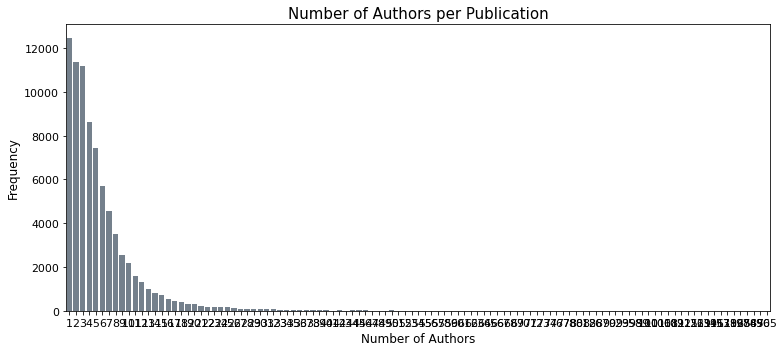

In [39]:
data_author_wo_anony = data_author.loc[data_author.AF != '[Anonymous]']
author_per_ppr = data_author_wo_anony.AF.apply(lambda x: len(x))
author_per_ppr_df = author_per_ppr.value_counts().rename_axis('Number of Authors').reset_index(name='Count').sort_values('Number of Authors')

plt.figure(figsize=(11,5))
g=sns.barplot(x=author_per_ppr_df['Number of Authors'],y=author_per_ppr_df['Count'], color='slategrey')
plt.xlabel('Number of Authors',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Authors per Publication', fontsize=15)
plt.tight_layout()
plt.savefig('author_per_ppr.jpg')
plt.show()

# By month

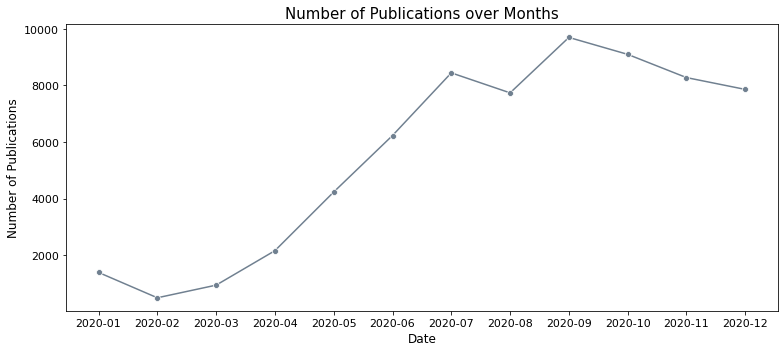

In [40]:
date_count = data_w_date.sort_values(by = 'PD').groupby('PD').size().rename_axis('Date').reset_index(name='Count')
plt.figure(figsize=(11,5))
g=sns.lineplot(x=date_count.Date, y=date_count.Count, color='slategrey', marker='o')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Number of Publications over Months', fontsize=15)
plt.tight_layout()
plt.savefig('date_count.jpg')
plt.show()

# By country over month

In [41]:
country_month = data_w_date[['C1', 'PD']].dropna()
country_month.C1 = country_month.C1.apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
country_month['country']=[list(set(i)) for i in [[j.split(', ')[-1] for j in i] for i in country_month.C1]]     
country_month['replace'] = [[replace(i) for i in j] for j in country_month['country']]
country_month['replace'] = [list(set(i)) for i in country_month['replace']]                                                 
country_month_all = country_month.explode('replace').drop(columns=['C1','country'])
country_month_all['num']=1
country_month_10 = country_month_all[country_month_all['replace'].isin(data_country_10['Countries'].to_list())].groupby(['PD','replace']).count().reset_index()


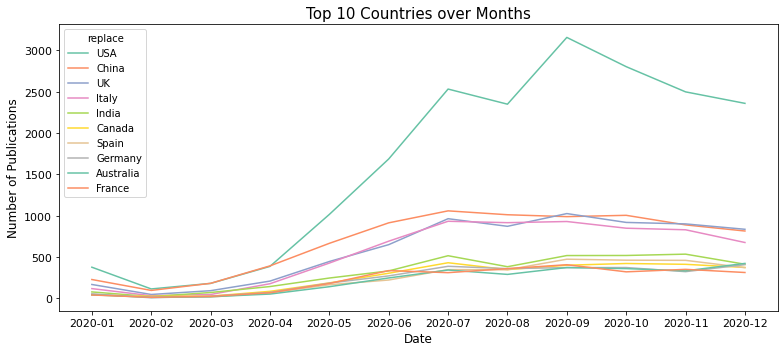

In [42]:

plt.figure(figsize=(11,5))
sns.lineplot(x=country_month_10['PD'], y=country_month_10['num'], hue=country_month_10['replace'],
            hue_order=data_country_10.Countries.to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Countries over Months', fontsize=15)
plt.tight_layout()
plt.savefig('country_month_10.jpg')
plt.show()


# Source over month

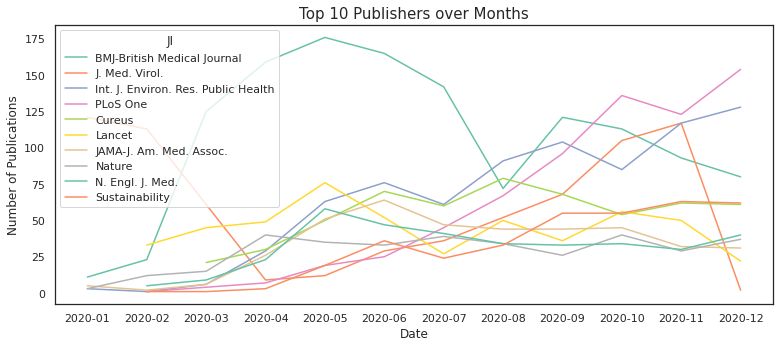

In [70]:
pub_month = data_w_date[['JI', 'PD']].dropna()
pub_month['Number']=1
pub_month_count_10 = pub_month[pub_month['JI'].isin(data_source['Title'].to_list())].groupby(['PD','JI']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=pub_month_count_10['PD'], y=pub_month_count_10['Number'], hue=pub_month_count_10['JI'],
            hue_order=data_source['Title'].to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Publishers over Months', fontsize=15)
plt.tight_layout()
plt.savefig('publisher_month.jpg')
plt.show()

# Research area over month

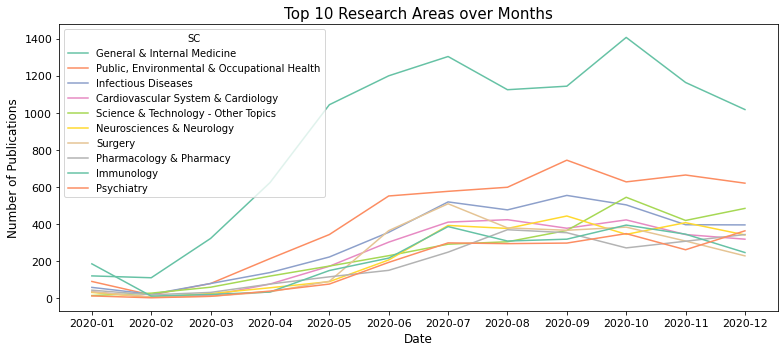

In [44]:
research_month = data_w_date[['SC','PD']].dropna()
research_month['SC'] = research_month['SC'].str.split('; ')
research_month_all = research_month.explode('SC')
research_month_all['num']=1
research_month_10 = research_month_all[research_month_all.SC.isin(data_research_all['ResArea'].to_list())].groupby(['PD','SC']).count().reset_index()

plt.figure(figsize=(11,5))
sns.lineplot(x=research_month_10['PD'], y=research_month_10['num'], 
             hue=research_month_10['SC'],
            hue_order=data_research_all['ResArea'].to_list(),
            palette='Set2')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of Publications',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Top 10 Research Areas over Months', fontsize=15)
plt.tight_layout()
plt.savefig('research_month.jpg')
plt.show()


# Keyword viz

In [45]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [74]:
def get_full_keywords(data_selected):
    data_selected['tok_title'] = [word_tokenize(title) for title in data_selected['TI']]
    data_selected['tok_abstract'] = [word_tokenize(title) for title in data_selected['AB']]
    stop_words=set(stopwords.words("english")+list(string.punctuation)+list(string.digits))
    data_selected['text']=data_selected['tok_title']+data_selected['tok_abstract']
    
    filtered_texts=[]
    for t in data_selected['text']:
        filtered_text=[]
        for word in t:
            if word.lower() not in stop_words:
                filtered_text.append(word)
        filtered_texts.append(filtered_text)

    keywords_text = [[item.lower() for item in sublist] for sublist in filtered_texts]
    kl = [x for sub in keywords_text for x in sub]
    
    keys_dist_20 = Counter(kl)
    return keys_dist_20

In [75]:
cloud = data[['TI','AB']].dropna()
key_freq = get_full_keywords(cloud)

In [76]:
key_freq.most_common(50)

[('covid-19', 157681),
 ('patients', 76568),
 ('pandemic', 54639),
 ('sars-cov-2', 40947),
 ('disease', 40943),
 ('coronavirus', 39031),
 ('health', 36689),
 ('study', 31162),
 ('infection', 25993),
 ('2020', 23823),
 ('clinical', 23807),
 ('results', 23538),
 ('severe', 22188),
 ('care', 22016),
 ('respiratory', 21283),
 ('2019', 20777),
 ('data', 20567),
 ('risk', 19990),
 ('may', 19158),
 ('cases', 18687),
 ('acute', 16365),
 ('treatment', 16007),
 ('also', 15609),
 ('virus', 15426),
 ('social', 14944),
 ('using', 14491),
 ('methods', 13856),
 ('analysis', 13313),
 ('associated', 13249),
 ('syndrome', 13145),
 ('use', 12957),
 ('p', 12735),
 ('public', 12606),
 ('among', 12585),
 ('new', 12400),
 ('time', 12281),
 ('used', 12263),
 ("'s", 12156),
 ('impact', 12096),
 ('symptoms', 11816),
 ('studies', 11585),
 ('outbreak', 11567),
 ('review', 11512),
 ('viral', 11457),
 ('patient', 11359),
 ('research', 11245),
 ('measures', 11057),
 ('mortality', 11029),
 ('potential', 10890),
 ('95

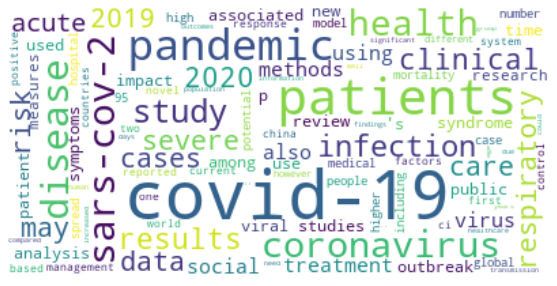

In [77]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_all.jpg')
plt.show()

In [78]:
data_1_4 = data_w_date.loc[data_w_date.PD <= '2020-04']
data_5_8 = data_w_date.loc[(data_w_date.PD > '2020-04') & (data_w_date.PD <= '2020-08')]
data_9_12 = data_w_date.loc[(data_w_date.PD > '2020-08') & (data_w_date.PD <= '2020-12')]

cloud_1_4 = data_1_4[['TI','AB']].dropna()
key_freq_1_4 = get_full_keywords(cloud_1_4)
cloud_5_8 = data_5_8[['TI','AB']].dropna()
key_freq_5_8 = get_full_keywords(cloud_5_8)
cloud_9_12 = data_9_12[['TI','AB']].dropna()
key_freq_9_12 = get_full_keywords(cloud_9_12)

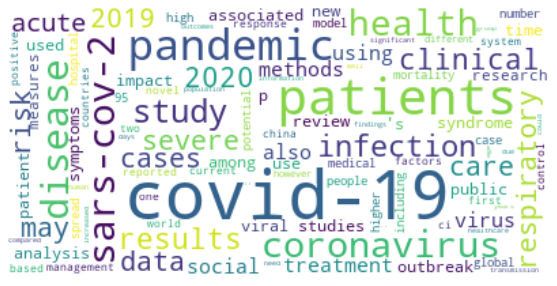

In [79]:
wordcloud_1_4 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq_1_4)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_1_4.jpg')
plt.show()

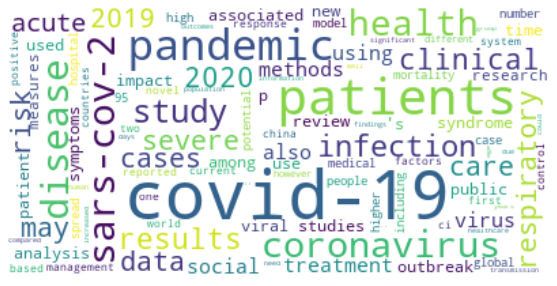

In [80]:
wordcloud_5_8 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq_5_8)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_5_8.jpg')
plt.show()

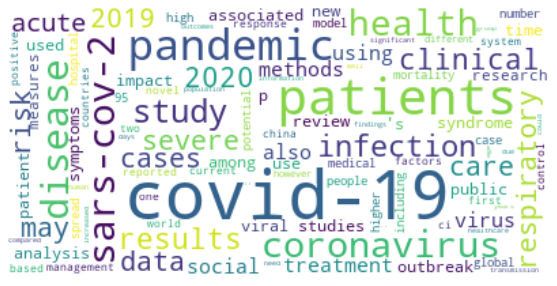

In [81]:
wordcloud_9_12 = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(key_freq_9_12)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_9_12.jpg')
plt.show()

# Corr

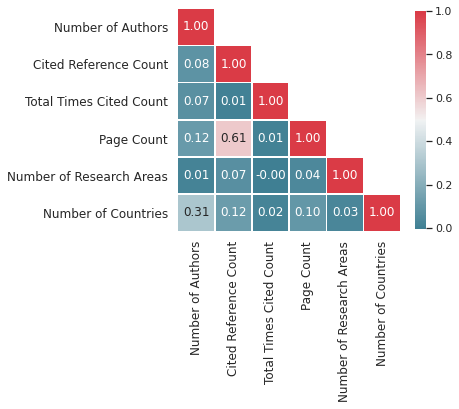

In [48]:
corr_ana = data[['AF', 'NR', 'Z9', 'PG', 'SC', 'C1']].dropna()
corr_ana['Number of Authors']=corr_ana['AF'].str.split(';').apply(lambda x: len(x))
corr_ana['Number of Research Areas']=corr_ana['SC'].str.split(';').apply(lambda x: len(x))
corr_ana['addresses'] = corr_ana['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
country_replace_corr = [[i.replace('North Ireland', 'UK').replace('Wales','UK').replace('Scotland', 'UK').replace('England', 'UK').replace('Czech Republic','Czech') 
for i in x] for x in corr_ana['addresses']]
corr_ana['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in country_replace_corr]]
corr_ana['Number of Countries'] = corr_ana['country_whole'].apply(lambda x: len(x))

corr= corr_ana[['Number of Authors', 'NR', 'Z9', 'PG', 'Number of Research Areas', 'Number of Countries']].rename(
    columns={"NR": "Cited Reference Count", "Z9": "Total Times Cited Count", "PG": "Page Count"}).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, annot=True, fmt = '.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax )

locs, labels = plt.yticks();
g.set_yticklabels(labels, rotation=0, size='medium')
locs, labels = plt.xticks();
g.set_xticklabels(labels, rotation=90, size='medium')
plt.savefig('corr.jpg')
plt.show()

# h-, g-index

In [49]:
def h_index(li):
    li_sorted=sorted(li, reverse=True)
    for i in li_sorted:
        if i < li_sorted.index(i)+1:
            break
    return li_sorted.index(i)

def g_index(li):
    li_sorted=sorted(li, reverse=True)
    for i in li_sorted:
        if sum(li_sorted[:li_sorted.index(i)+1])<(li_sorted.index(i)+1)**2:
            break
    return li_sorted.index(i)+1

In [50]:
data_author_index = data[['AF', 'Z9']].dropna()
data_author_index['Authors'] = data_author_index['AF'].str.split(';')
data_author_index_sep = data_author_index.explode('Authors').reset_index().drop(columns=['index','AF'])
data_author_index_sep=data_author_index_sep[['Authors','Z9' ]]
data_h=data_author_index_sep.groupby('Authors').agg(lambda x: list(x)).reset_index()
data_h['h_index']= data_h['Z9'].apply(h_index)
h_index_top10 = data_h.sort_values('h_index',ascending=False).drop(columns='Z9').reset_index(drop=True).head(20)
data_h['g_index']= data_h['Z9'].apply(g_index)
g_index_top10 = data_h.sort_values(['h_index','g_index'],ascending=False).drop(columns='Z9').reset_index(drop=True).head(20)
g_index_top10

,Authors,h_index,g_index
0,"Liu, Lei",26,48
1,"Drosten, Christian",22,35
2,"Wang, Wei",20,50
3,"Baric, Ralph S.",20,38
4,"Zhang, Wei",19,47
5,"Yuen, Kwok-Yung",18,46
6,"Lippi, Giuseppe",18,28
7,"Wang, Ying",17,44
8,"Zhang, Zheng",17,23
9,"Lippi, Giuseppe",16,46


# Deg of collab

In [51]:
colab_month_w_anonymous = data_w_date[['PD', 'AF']].dropna()
colab_month = colab_month_w_anonymous.loc[colab_month_w_anonymous['AF'] !='[Anonymous]'].copy()
colab_month[['AF']]=colab_month[['AF']].applymap(list)
colab_month['AF'] = colab_month['AF'].apply(lambda x: ';' in x).astype('int')

colab_month_sep=colab_month.groupby('PD')['AF'].value_counts().rename_axis(['Date','sin/mul']).reset_index(name='Count')
deg_colab_pivot = colab_month_sep.pivot(index='Date', columns='sin/mul', values='Count').fillna(0).reset_index()
deg_colab_pivot['deg_colab']=deg_colab_pivot[1]/(deg_colab_pivot[0]+deg_colab_pivot[1])
deg_colab_pivot

sin/mul,Date,0,1,deg_colab
0,2020-01,189,1198,0.863735
1,2020-02,99,384,0.795031
2,2020-03,308,608,0.663755
3,2020-04,573,1491,0.722384
4,2020-05,1043,3068,0.746290
5,2020-06,1119,5007,0.817336
6,2020-07,1373,6949,0.835016
7,2020-08,1052,6619,0.862860
8,2020-09,1443,8186,0.850140
9,2020-10,1114,7909,0.876538


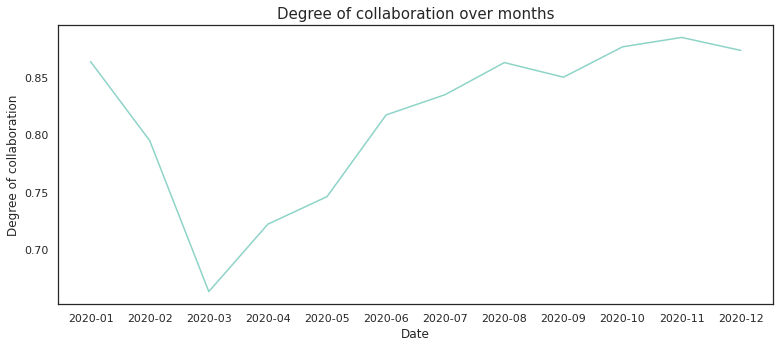

In [52]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    plt.figure(figsize=(11,5))
    sns.lineplot(x=deg_colab_pivot['Date'], y=deg_colab_pivot['deg_colab'],
            #hue_order=deg_colab_pivot.sort_values(by=['Date'])['Funding'].tolist(),
            palette='Set2')

    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Degree of collaboration',fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.title('Degree of collaboration over months', fontsize=15)
    plt.tight_layout()
    plt.savefig('deg_colab.pdf')
    plt.show()

# International collab & Research area

In [53]:
int_colab = data_w_date[['PD','C1']].dropna()
int_colab['C1'] = int_colab['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
int_colab['country_whole']=[list(set(i)) for i in [[j.split(', ')[-1] for j in i] for i in int_colab['C1']]]
int_colab['replace'] = [[replace(i) for i in j] for j in int_colab['country_whole']]
int_colab['replace'] = [list(set(i)) for i in int_colab['replace']]
int_colab['num_country'] = int_colab['replace'].apply(lambda x: len(x))
int_colab.loc[int_colab['num_country']>1, 'num_country'] = 2
int_colab_counts = int_colab.groupby('PD')['num_country'].value_counts().rename_axis(['date','collab']).reset_index(name='Count').pivot(index='date', columns='collab', values='Count').fillna(0).reset_index()
int_colab_counts['percentage_inter_colab']=int_colab_counts[2]/(int_colab_counts[1]+int_colab_counts[2])
int_colab_counts


collab,date,1,2,percentage_inter_colab
0,2020-01,1067,287,0.211965
1,2020-02,330,97,0.227166
2,2020-03,533,192,0.264828
3,2020-04,1357,415,0.234199
4,2020-05,2838,874,0.235453
5,2020-06,4444,1326,0.229809
6,2020-07,6147,1754,0.221997
7,2020-08,5687,1690,0.229090
8,2020-09,7233,1980,0.214914
9,2020-10,6667,1860,0.218131


In [54]:
ra_sm = data_w_date[['PD','SC']].dropna()
ra_sm['SC'] = ra_sm['SC'].str.split(';')
ra_sm['cnt'] = ra_sm['SC'].apply(lambda x: len(x))

ra_sm.loc[ra_sm['cnt']>1, 'cnt'] = 2
ra_sm_counts = ra_sm.groupby('PD')['cnt'].value_counts().rename_axis(['date','ra']).reset_index(name='Count').pivot(index='date', columns='ra', values='Count').fillna(0).reset_index()
ra_sm_counts['percentage_multi_disp']=ra_sm_counts[2]/(ra_sm_counts[1]+ra_sm_counts[2])
ra_sm_counts

ra,date,1,2,percentage_multi_disp
0,2020-01,895,496,0.356578
1,2020-02,406,89,0.179798
2,2020-03,749,193,0.204883
3,2020-04,1772,388,0.179630
4,2020-05,3202,1032,0.243741
5,2020-06,4598,1633,0.262077
6,2020-07,6099,2347,0.277883
7,2020-08,5393,2346,0.303140
8,2020-09,6777,2922,0.301268
9,2020-10,6315,2785,0.306044


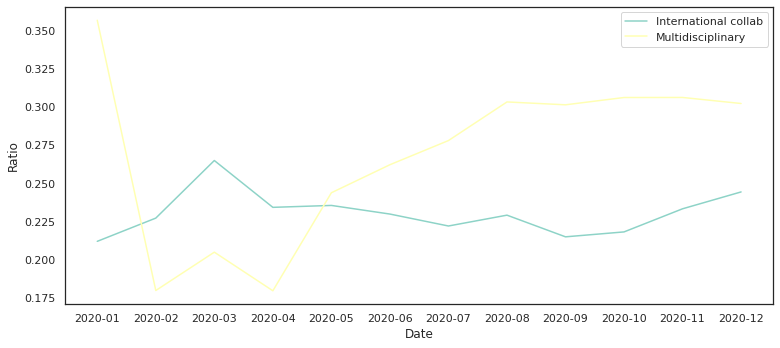

In [55]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
    plt.figure(figsize=(11,5))
    sns.lineplot(x=int_colab_counts['date'], y=int_colab_counts['percentage_inter_colab'], label='International collab', color = 'springgreen')
    sns.lineplot(x=ra_sm_counts['date'], y=ra_sm_counts['percentage_multi_disp'], label='Multidisciplinary', color = 'salmon')
    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Ratio',fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend()
    plt.tight_layout()
    plt.savefig('int_colab_ratio.jpg')
    plt.show()

# summary tb

In [ ]:
sum_tb = data[['SC', 'NR', 'Z9']].dropna().reset_index(drop=True)
sum_tb['SC'] = sum_tb['SC'].str.split(';')
sum_tb_full = sum_tb.explode('SC')
sum_tb_full['cnt']=1
sum_group = sum_tb_full.groupby('SC').sum()
sum_group['Cited Reference Count per']=sum_group['NR']/sum_group['cnt']
sum_group['Times Cited per']=sum_group['Z9']/sum_group['cnt']
sum_group.sort_values(by=['Times Cited per'], ascending=False).head(20)

In [ ]:
sum_country = data[['C1', 'NR', 'Z9']].dropna().reset_index(drop=True)
sum_country['C1'] = sum_country['C1'].apply(lambda x: re.sub(r"\[(.*?)\]", "", x).split('; ')).to_list()
sum_country['country_whole']=[list(set(i)) for i in [[j.split()[-1] for j in i] for i in sum_country['C1']]]                                                      
sum_country_full = sum_country.explode('country_whole').drop(columns='C1')
sum_country_full['num']=1
sum_country_g = sum_country_full.groupby('country_whole').sum()
sum_country_g['Cited Reference Count per'] = sum_country_g['NR']/sum_country_g['num']
sum_country_g['Times Cited per'] = sum_country_g['Z9']/sum_country_g['num']
sum_country_g.sort_values(by=['Times Cited per'], ascending=False).head(20)


# Networkx

In [56]:
def to_network(matrix):
    unik=[]
    for i in matrix:
        for j in i:
            unik.append(j)
    keys=list(set(unik))

    dicti={}
    for key in keys:
        value=[]
        for sublist in matrix:
            if key in sublist:
                li = list(sublist)
                li.remove(key)
                value=value+list(set(li))        
        dicti[key]=value
        
    G = nx.Graph()
    for key, value in dicti.items():
        for i in list(value):
            G.add_edge(key, i, weight = value.count(i))       
    return G

In [82]:
matrix_author = list(data_author['AF'])
nw_author = to_network(matrix_author)

In [83]:
matrix_inst = list(data_inst['C1'])
nw_institute = to_network(matrix_inst)

In [84]:
country_mtx_df = list(data_country['replace_1'])
nw_country = to_network(country_mtx_df)

In [85]:
matrix_ra = list(data_research['SC'])
nw_ra = to_network(matrix_ra)

In [ ]:
matrix_kwd = [[i.lower() for i in j ]for j in data_keywords.DE]
nw_kwd = to_network(matrix_kwd)

# Centrality author

In [ ]:
def centrality(G):
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()   
    bet_cen = nx.betweenness_centrality(S)
    pagerank = nx.pagerank(S)
    betweeness = pd.DataFrame(sorted(bet_cen.items(), key=lambda item: item[1], reverse=True), columns=['Name','betweeness']).reset_index(drop=True)
    pgrk = pd.DataFrame(sorted(pagerank.items(), key=lambda item: item[1], reverse=True), columns=['Name','pagerank']).reset_index(drop=True)
    return pd.merge(betweenness,pgrk,on='Name',how='outer').sort_values(by=['betweeness','pagerank'], ascending=False).head(10)

In [ ]:
centrality_au = centrality(nw_author)
centrality_au.to_excel('/content/drive/MyDrive/cen_au.xlsx')
centrality_au


In [ ]:
nx.number_connected_components(nw_author)

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)][:10]

In [ ]:

largest_au_cc = [c for c in max(nx.connected_components(nw_author), key=len)]
count=0
for i in centrality_au.Name:
  if i in largest_au_cc:
    count+=1
count

In [ ]:
len(max(nx.connected_components(nw_author), key=len))/len(nw_author)

In [ ]:
#check most important authors belong to what communities

# Centrality institute

In [ ]:
centrality_inst = centrality(nw_institute)
centrality_inst.to_excel('/content/drive/MyDrive/cen_inst.xlsx')
centrality_inst

In [ ]:
nx.number_connected_components(nw_institute)

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_institute), key=len, reverse=True)][:10]

In [ ]:
largest_ins_cc = [c for c in max(nx.connected_components(nw_institute), key=len)]
count_ins=0
for i in centrality_inst.Name:
  if i in largest_ins_cc:
    count_ins+=1
count_ins

# Centrality country

In [ ]:
centrality_country = centrality(nw_country)
centrality_country.to_excel('/content/drive/MyDrive/cen_cntry.xlsx')
centrality_country

In [ ]:
nx.number_connected_components(nw_country)

In [ ]:
[len(c) for c in sorted(nx.connected_components(nw_country), key=len, reverse=True)]

# Co-author

In [86]:
co_author = pd.DataFrame(sorted(nw_author.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])
co_author.to_excel('/content/drive/MyDrive/co_author.xlsx')
co_author

,0,1,2
0,"Hasan, Syed Shahzad","Kow, Chia Siang",{'weight': 35}
1,"Wiwanitkit, Viroj","Joob, Beuy",{'weight': 35}
2,"Yuen, Kwok-Yung","Chan, Jasper Fuk-Woo",{'weight': 33}
3,"Rodriguez-Morales, Alfonso J.","Dhama, Kuldeep",{'weight': 31}
4,"To, Kelvin Kai-Wang","Yuen, Kwok-Yung",{'weight': 31}
5,"Saussez, Sven","Lechien, Jerome R.",{'weight': 31}
6,"Henry, Brandon Michael","Lippi, Giuseppe",{'weight': 30}
7,"Tiwari, Ruchi","Dhama, Kuldeep",{'weight': 29}
8,"Zhao, Shi","He, Daihai",{'weight': 29}
9,"Rodriguez-Morales, Alfonso J.","Sah, Ranjit",{'weight': 28}


In [87]:
nx.number_of_edges(nw_author)

2583357

In [88]:
nx.number_of_selfloops(nw_author)

162

In [89]:
nx.number_of_nodes(nw_author)

290925

In [90]:
#isolated nodes
len(set([i for j in matrix_author for i in j]))-nx.number_of_nodes(nw_author)

7640

# co-occur institutions


In [91]:
co_institutions = pd.DataFrame(sorted(nw_institute.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])
co_institutions.to_excel('/content/drive/MyDrive/co_institutions.xlsx')
co_institutions

,0,1,2
0,Huazhong Univ Sci & Technol,Huazhong Univ Sci & Technol,{'weight': 537}
1,Wuhan Univ,Wuhan Univ,{'weight': 361}
2,Univ Toronto,Univ Toronto,{'weight': 332}
3,Harvard Med Sch,Harvard Med Sch,{'weight': 264}
4,Harvard Med Sch,Massachusetts Gen Hosp,{'weight': 234}
5,Univ Tehran Med Sci,Univ Tehran Med Sci,{'weight': 219}
6,Univ Milan,Univ Milan,{'weight': 204}
7,Harvard Med Sch,Brigham & Womens Hosp,{'weight': 203}
8,Columbia Univ,Columbia Univ,{'weight': 201}
9,Univ Penn,Univ Penn,{'weight': 196}


In [92]:
nx.number_of_selfloops(nw_institute)

7868

In [93]:
nx.number_of_edges(nw_institute)

524881

In [94]:
nx.number_of_nodes(nw_institute)

48745

In [95]:
#isolated nodes
len(set([i for j in matrix_inst for i in j]))-nx.number_of_nodes(nw_institute)

2767

# node: country

In [96]:
co_country = pd.DataFrame(sorted(nw_country.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:20])
co_country.to_excel('/content/drive/MyDrive/co_country.xlsx')
co_country

,0,1,2
0,USA,USA,{'weight': 10721}
1,USA,UK,{'weight': 1554}
2,USA,China,{'weight': 1490}
3,USA,Italy,{'weight': 1146}
4,USA,Canada,{'weight': 1117}
5,UK,Italy,{'weight': 895}
6,USA,Australia,{'weight': 794}
7,USA,Germany,{'weight': 699}
8,UK,Australia,{'weight': 652}
9,UK,China,{'weight': 639}


In [97]:
nx.number_of_selfloops(nw_country)

2

In [98]:
nx.number_of_edges(nw_country)

6367

In [99]:
nx.number_of_nodes(nw_country)

198

In [100]:
len(set([i for j in country_mtx_df for i in j]))-nx.number_of_nodes(nw_country)

4

# co-occurrence of research area

In [101]:
co_occur_ra = pd.DataFrame(sorted(nw_ra.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))[:20]
co_occur_ra.to_excel('/content/drive/MyDrive/co_occur_ra.xlsx')
co_occur_ra

,0,1,2
0,Environmental Sciences & Ecology,"Public, Environmental & Occupational Health",{'weight': 907}
1,Infectious Diseases,Immunology,{'weight': 882}
2,"Public, Environmental & Occupational Health",Infectious Diseases,{'weight': 880}
3,Infectious Diseases,Microbiology,{'weight': 827}
4,Microbiology,Immunology,{'weight': 655}
5,Psychology,Psychiatry,{'weight': 601}
6,Cell Biology,Biochemistry & Molecular Biology,{'weight': 568}
7,Respiratory System,General & Internal Medicine,{'weight': 530}
8,Health Care Sciences & Services,Medical Informatics,{'weight': 443}
9,Science & Technology - Other Topics,Environmental Sciences & Ecology,{'weight': 416}


In [102]:
nx.number_of_edges(nw_ra)

1069

In [103]:
nx.number_of_selfloops(nw_ra)

0

In [104]:
nx.number_connected_components(nw_ra)

1

In [105]:
[len(c) for c in sorted(nx.connected_components(nw_ra), key=len, reverse=True)]

[150]

In [106]:
nx.number_of_nodes(nw_ra)

150

In [107]:
#isolated nodes
len(set([i for j in matrix_ra for i in j]))-nx.number_of_nodes(nw_ra)

1

# author keyword co-occurrence

In [ ]:
co_occur_key = pd.DataFrame(sorted(nw_kwd.edges(data=True),key= lambda x: x[2]['weight'],reverse=True))[:20]
co_occur_key.to_excel('/content/drive/MyDrive/co_occur_key.xlsx')
co_occur_key

# small-world

In [108]:
len(max(nx.connected_components(nw_author), key=len))

185251

In [ ]:
largest_cc = max(nx.connected_components(nw_author), key=len)
S = nw_author.subgraph(largest_cc).copy()
nx.average_shortest_path_length(S)

In [ ]:
import math
math.log(len(max(nx.connected_components(nw_author), key=len)))

# Scale-free

In [ ]:
!pip install powerlaw

In [ ]:
import powerlaw

In [ ]:
degree_sequence = sorted([d for n, d in nw_author.degree()], reverse=True)
len_deg_seq = len(degree_sequence)

In [ ]:
fit = powerlaw.Fit(degree_sequence)

In [ ]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig2)

In [ ]:
deg_occur = []
for i in degree_sequence:
  num = degree_sequence.count(i)
  deg_occur.append(num)

In [ ]:
with plt.style.context({'axes.prop_cycle' : plt.cycler('color', plt.cm.Set3.colors)}):
  f, ax = plt.subplots()
  ax.set(xscale="log", yscale="log")
  sns.scatterplot(x=degree_sequence, y=deg_occur, ax=ax)


In [ ]:
f, ax = plt.subplots()

sns.scatterplot(x=degree_sequence, y=deg_occur)

# assort co-author ntw (double check this section)

In [ ]:
sub_nw_author_component = [nw_author.subgraph(c).copy() for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)]
assort_l = []
avg_clustering = []
for k in sub_nw_author_component:
  r = nx.degree_assortativity_coefficient(k)
  clust = nx.average_clustering(k)
  assort_l.append(f"{r:3.1f}")
  avg_clustering.append(clust)

In [ ]:
assort = [i.replace('nan', '100') for i in assort_l]
assortativity = [float(i) for i in assort]
weight_au_component_norm = [len(c)/len(nw_author) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)]
weight_au_component = [len(c) for c in sorted(nx.connected_components(nw_author), key=len, reverse=True)]


In [ ]:
assort_non_nan = []
weight_au_component_non_nan = []
for i,j in zip(assortativity, weight_au_component):
  if i!=float(100):
    assort_non_nan.append(i)
    weight_au_component_non_nan.append(j)
print(assort_non_nan)

In [ ]:
print(weight_au_component_non_nan[-11:])

In [ ]:
print(assort_non_nan[-20:])
#component

In [ ]:
len(assort_non_nan)

In [ ]:
plt.plot(assort_non_nan)

In [ ]:
plt.plot(assortativity)
#change 100 to 0 in the above cell

In [ ]:
sum(weight_au_component_non_nan)

In [ ]:
#removing nan assortativity components. weighted avg
product_1=[]
for i,j in zip(assort_non_nan, weight_au_component_non_nan):
  product_1.append(i*j/sum(weight_au_component_non_nan))
sum(product_1)

In [ ]:
sum(assort_non_nan)/len(assort_non_nan)

# clustering co-au

In [ ]:
nx.average_clustering(nw_author)
#this is correct (local)